In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
import random
from Models.Charts import Charts
from Models.P_1 import P_1

/home/guille/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

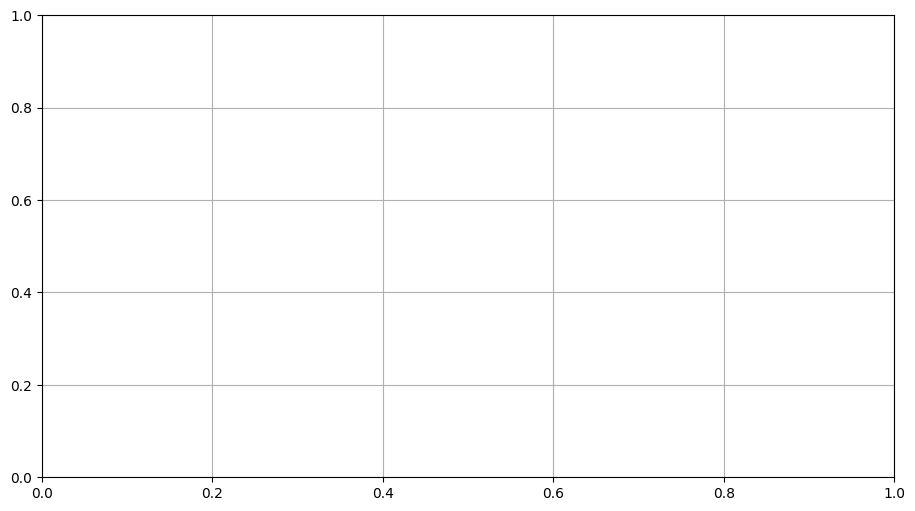

In [2]:
file = 'datos/avocado.csv'
chart = Charts(file)
#Hacemos una limpieza la columna Unnamed
chart.clearData('Unnamed: 0')
# Comprobamos si hay valores nulos
chart.isNull()
chart.showData()
# po = P_1()
# po.p1_1()

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64


(array([16556., 16679., 16801., 16922., 17045., 17167., 17287., 17410.,
        17532.]),
 [Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01'),
  Text(17287.0, 0, '2017-05'),
  Text(17410.0, 0, '2017-09'),
  Text(17532.0, 0, '2018-01')])

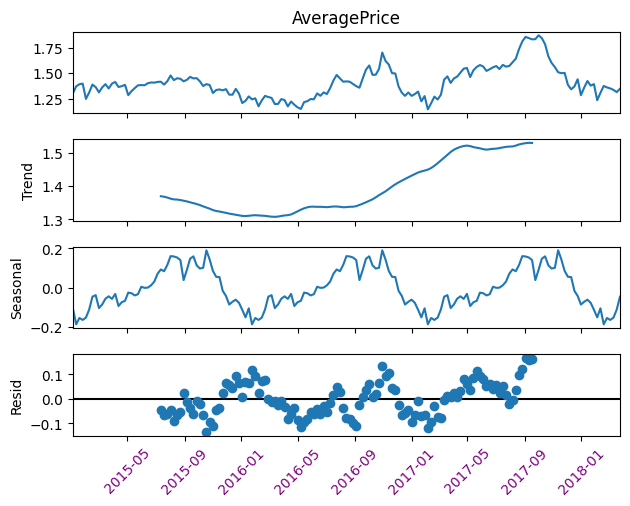

In [3]:
# 1.1 Descomposición de Series Temporales de Precios:

# Uso de Datos: Usa la columna AveragePrice y Date.
# Esperado: Utiliza la función seasonal_decompose de la librería statsmodels para descomponer la serie temporal de precios en componentes de tendencia, estacionalidad y ruido.
# Convierte Date a tipo datetime usando pd.to_datetime().
# Agrupa los datos por Date y calcula el promedio de AveragePrice utilizando groupby() si es necesario.
# Visualiza los componentes descompuestos usando matplotlib para cada uno de ellos.
chart.formatDate('Date')
promedio_por_fecha = chart.df.groupby('Date')['AveragePrice'].mean()
print(promedio_por_fecha)
descomposicion = chart.seasonal_decompose(promedio_por_fecha, model='additive',period=54)
descomposicion.plot()
# promedio_por_fecha.plot()
plt.xticks(rotation=45,color="purple")

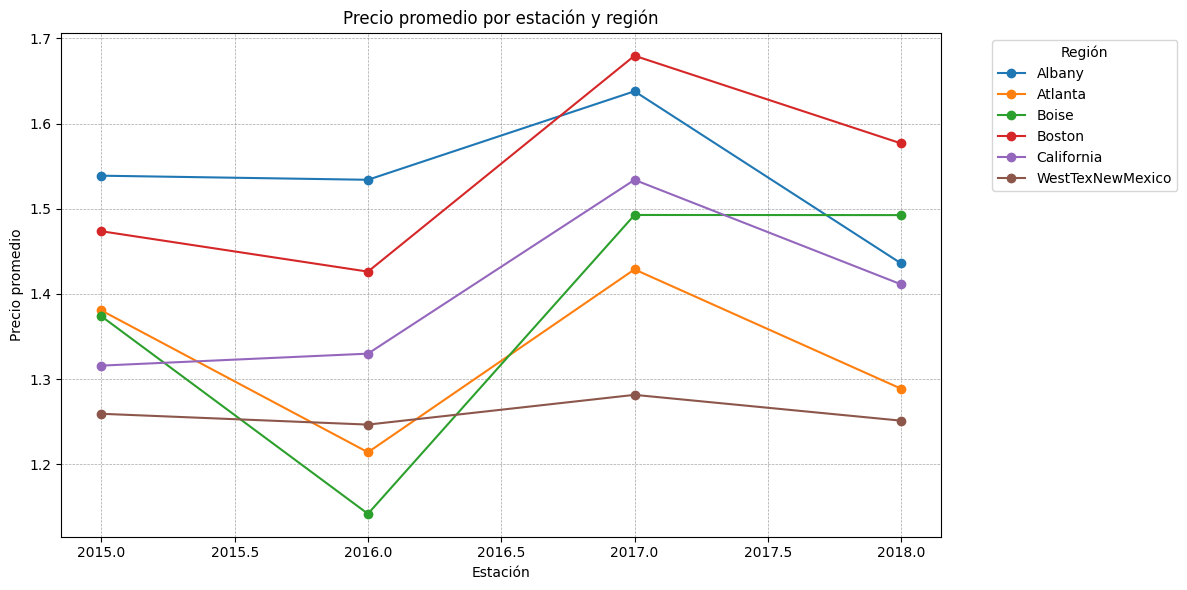

In [4]:
# 1.2 Análisis de Estacionalidad por Región:

# Uso de Datos: Usa las columnas AveragePrice, Date y Total Volume.
# Esperado: Utiliza gráficos de líneas para visualizar cómo varían los precios de aguacates por región a lo largo de diferentes estaciones del año.
# Agrupa los datos por region y Date utilizando groupby().
# Calcula el promedio de AveragePrice para cada región.
# Representa gráficamente las tendencias utilizando plt.plot() de matplotlib.

regiones_seleccionadas = ['Albany', 'Atlanta', 'Boise','Boston','California','WestTexNewMexico']
chart.df['year'] = chart.df['Date'].dt.year
promedio_anual = chart.df[chart.df['region'].isin(regiones_seleccionadas)].groupby(['region', 'year'])['AveragePrice'].mean().reset_index()
chart.figureConfig(12,6,title='Precio promedio por estación y región',xlabel="Estación",ylabel="Precio promedio")

# Itera sobre cada región para graficar su línea
for region in promedio_anual['region'].unique():
    region_data = promedio_anual[promedio_anual['region'] == region]
    plt.plot(region_data['year'], region_data['AveragePrice'], label=region,marker="o")

# Configura el título y etiquetas
plt.legend(title='Región', bbox_to_anchor=(1.05, 1), loc='upper left')

# Muestra la gráfica
plt.tight_layout()
plt.grid(True,color='gray', linestyle='--', linewidth=0.5, alpha=0.7, which='both')
plt.show()

# promedio_anual.sample(frac=0.2).sort_values(by=['year', 'region'])


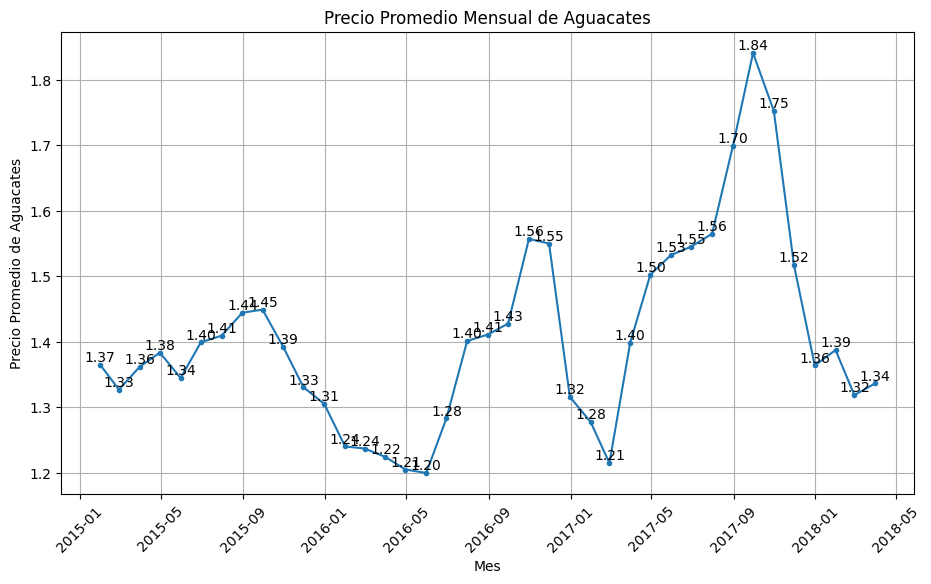

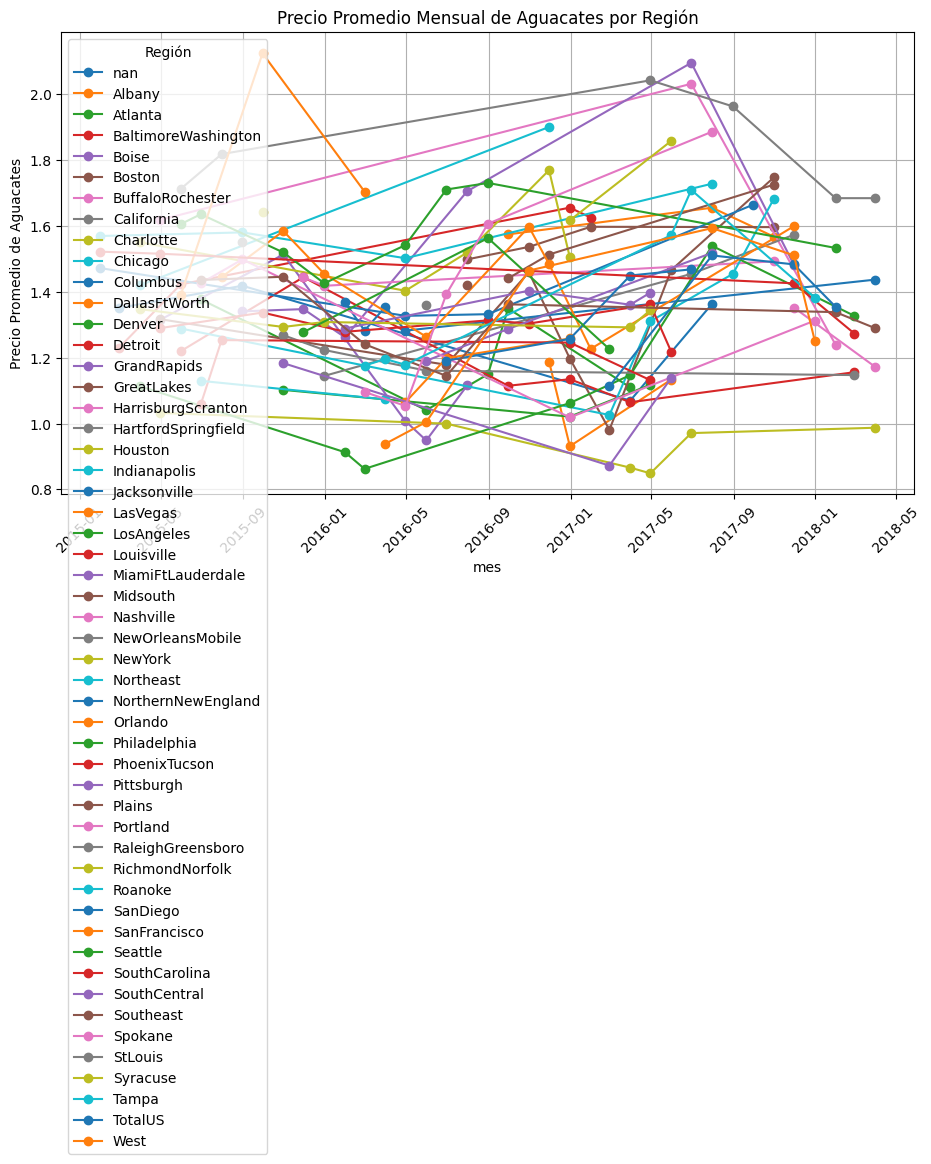

In [5]:
# 1.3 Comparación de Precios Promedio Mensuales:
# Uso de Datos: Usa las columnas AveragePrice y Date.
# Esperado: Calcula y compara los precios promedio mensuales.
# Agrupa los datos por mes usando pd.Grouper con freq='M'.
# Calcula el promedio de AveragePrice para cada mes con mean().
# Visualiza los resultados con un gráfico de líneas usando plt.plot().
# Agrupa los datos por 'region' y por mes, y calcula el promedio de 'AveragePrice'

# Agrupo por mes y calcular el promedio de AveragePrice (Calcula y compara los precios promedio mensuales.)
promedio_mensual = chart.df.groupby(pd.Grouper(key='Date', freq='ME'))['AveragePrice'].mean().reset_index()
chart.figureConfig(title='Precio Promedio Mensual de Aguacates',xlabel="Mes",ylabel="Precio Promedio de Aguacates")

# Graficar el promedio mensual de AveragePrice
plt.plot(promedio_mensual['Date'], promedio_mensual['AveragePrice'], marker='.', label='Precio Promedio Mensual')

# Agregar etiquetas de valor sobre cada punto de la línea de cada región
chart.paintPlotTitle(promedio_mensual,'Date','AveragePrice')
plt.xticks(rotation=45)
plt.show()

# Ahora agrupar por 'region' y por mes para calcular el promedio
promedio_mensual_region = chart.df.groupby(['region', pd.Grouper(key='Date', freq='ME')])['AveragePrice'].mean().reset_index()

# Tamaño de la figura para el gráfico por región
chart.figureConfig(title='Precio Promedio Mensual de Aguacates por Región',xlabel="mes",ylabel='Precio Promedio de Aguacates')

promedio_mensual_region['region'] = promedio_mensual_region['region'].fillna(0).sample(frac=0.1)
# Graficar el promedio mensual de AveragePrice por región
for region in promedio_mensual_region['region'].unique():
    region_data = promedio_mensual_region[promedio_mensual_region['region'] == region]
    plt.plot(region_data['Date'], region_data['AveragePrice'], marker='o', label=region)



# Configurar título y etiquetas

plt.xticks(rotation=45)
plt.legend(title='Región')


# Mostrar el gráfico
plt.show()

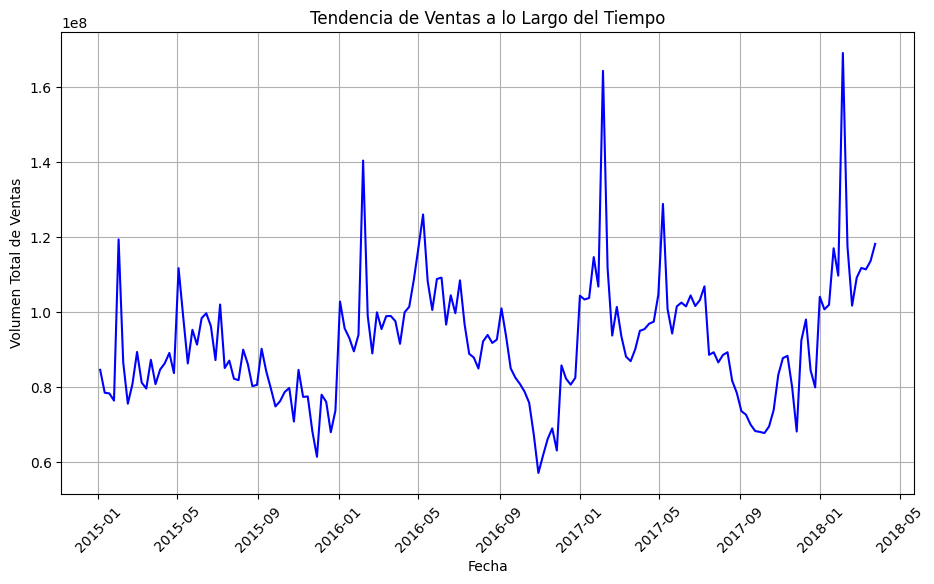

In [6]:
# 1.4 Tendencia de Ventas a lo Largo del Tiempo:

# Uso de Datos: Usa las columnas Total Volume y Date.
# Esperado: Analiza cómo varía el volumen total de ventas a lo largo del tiempo.
# Agrupa los datos por Date y suma el Total Volume usando groupby().
# Visualiza los resultados usando un gráfico de líneas con plt.plot() para mostrar la tendencia.

chart.figureConfig(title="Tendencia de Ventas a lo Largo del Tiempo",xlabel="Fecha",ylabel="Volumen Total de Ventas")
# Agrupar por fecha y sumar el volumen total
df_grouped = chart.df.groupby('Date').agg({
    'Total Volume':'sum'
})

plt.plot(df_grouped.index, df_grouped.values, marker='', color='blue', label='Volumen Total')
plt.xticks(rotation=45)
plt.show()

# Aqui la tendencia es que prograsivamente ha ido subiendo la venta de aguacates en los meses de Enero/Febrero y Mayo
# La tendencia es al Alza

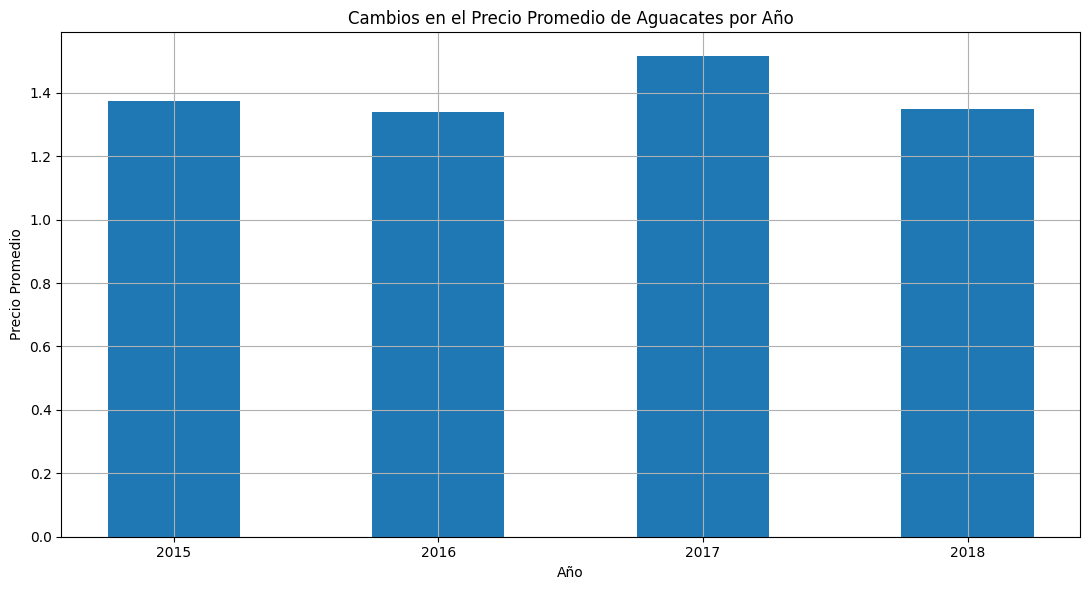

In [7]:
# 1.5 Análisis de Cambios en Precios Anuales:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Observa las diferencias anuales en los precios promedio.
# Agrupa los datos por year utilizando groupby().
# Calcula el promedio de AveragePrice para cada año.
# Representa los resultados en un gráfico de barras usando plt.bar() que compare los precios de cada año.
promedio_year =  chart.df.groupby('year')['AveragePrice'].mean().reset_index()
chart.figureConfig(title="Cambios en el Precio Promedio de Aguacates por Año",xlabel="Año",ylabel="Precio Promedio")
# Crear el gráfico de barras
plt.bar(promedio_year['year'], promedio_year['AveragePrice'], width=0.5)
plt.xticks(promedio_year['year'])  # Asegura que se muestren todos los años
plt.tight_layout()
plt.show()

/tmp/ipykernel_808/2994794482.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='region', y='Total Volume', data=chart.df, palette="muted",legend=False)


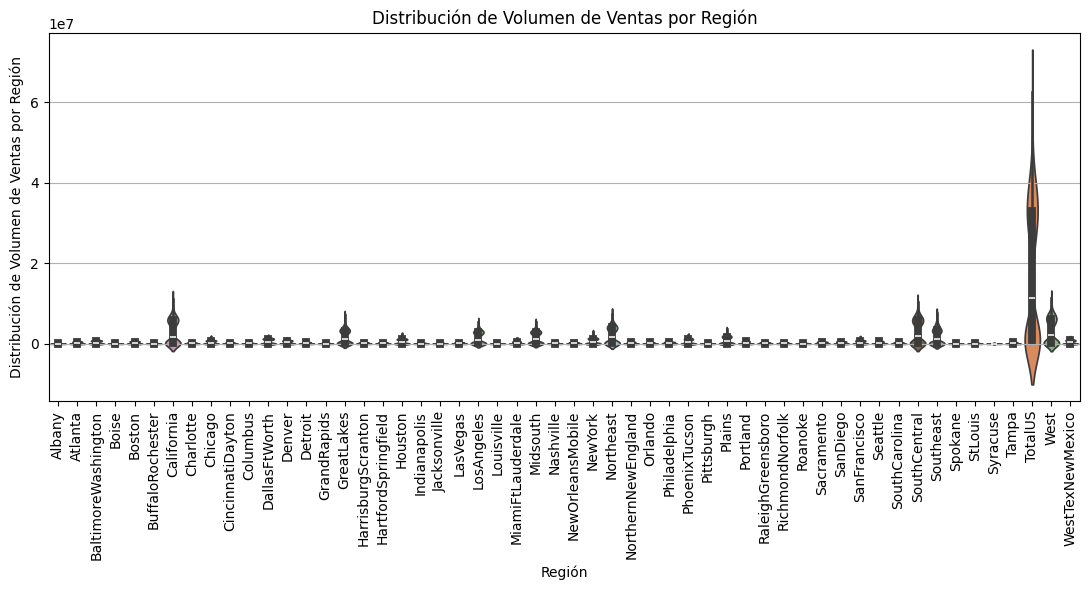

In [8]:
# 2.1 Gráficos para Visualización de Datos
# Resumen: La visualización de datos es clave para identificar patrones y relaciones entre diferentes variables. 
# Los gráficos apropiados pueden proporcionar información valiosa sobre el comportamiento de los precios y volúmenes de ventas.

# Gráfico de Violín de Volumen de Ventas por Región:
# Uso de Datos: Usa las columnas Total Volume y region.
# Esperado: Visualiza la distribución de ventas en diferentes regiones.
# Utiliza la función violinplot de seaborn para crear gráficos de violín.
# Configura los ejes para mostrar la relación entre Total Volume y region.
# Añade etiquetas y títulos usando plt.title() y plt.xlabel() para facilitar la interpretación.

# Gráfico de violín de Volumen de Ventas por Región
chart.figureConfig(title='Distribución de Volumen de Ventas por Región',xlabel="Región",ylabel='Distribución de Volumen de Ventas por Región')
sns.violinplot(x='region', y='Total Volume', data=chart.df, palette="muted",legend=False)

# Configuraciones del gráfico
plt.xticks(rotation=90)  # Rotar etiquetas para mejorar visibilidad


plt.tight_layout()  # Ajusta el diseño para evitar superposición
plt.show()

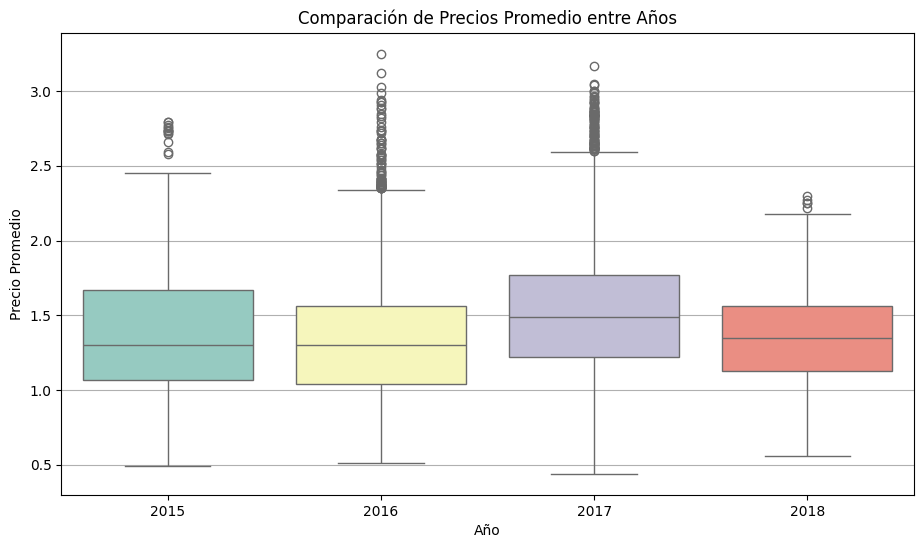

In [9]:
# 2.2 Boxplot Comparativo de Precios entre Años:

# Uso de Datos: Usa las columnas AveragePrice y year.
# Esperado: Genera boxplots para comparar la distribución de precios.
# Utiliza boxplot de seaborn para crear boxplots que comparen AveragePrice entre diferentes años.
# Asegúrate de que cada boxplot represente un año diferente.
# Incluye etiquetas y títulos descriptivos usando plt.title().


# Gráfico boxplot comparativo de Precios entre Años
chart.figureConfig(title='Comparación de Precios Promedio entre Años',ylabel='Precio Promedio',xlabel='Año')
sns.boxplot(x='year', y='AveragePrice', data=chart.df, palette="Set3", hue='year', legend=False)
# Configuraciones del gráfico
plt.show()

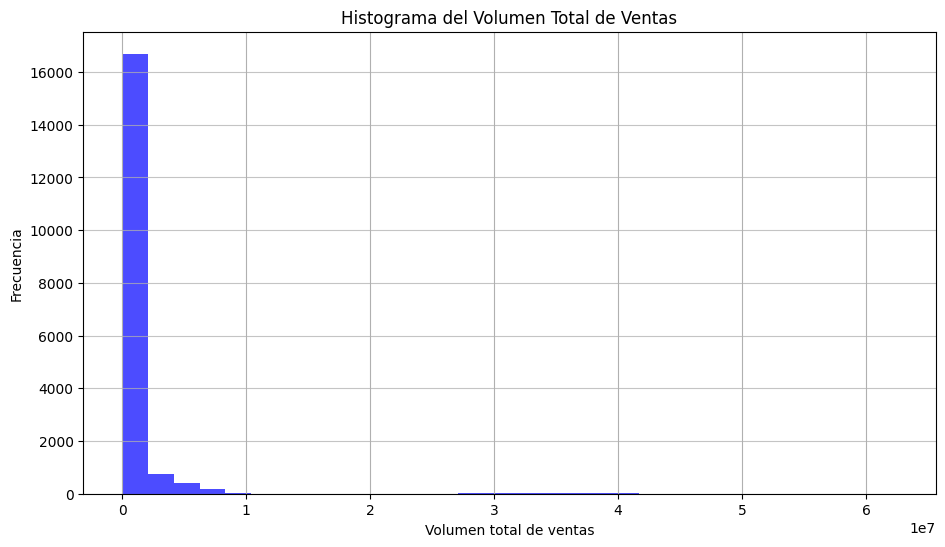

In [10]:
# 2.3 Histograma de Volumen Total de Ventas:

# Uso de Datos: Usa la columna Total Volume.
# Esperado: Crea un histograma para mostrar la distribución del volumen total de ventas.
# Utiliza hist() de matplotlib para crear el histograma.
# Ajusta el número de bins para una visualización clara usando el parámetro bins.
# Añade etiquetas y un título que describa lo que se muestra.

chart.figureConfig(title='Histograma del Volumen Total de Ventas',xlabel="Volumen total de ventas",ylabel="Frecuencia")
plt.hist(chart.df['Total Volume'], bins=30, color='blue', alpha=0.7)

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

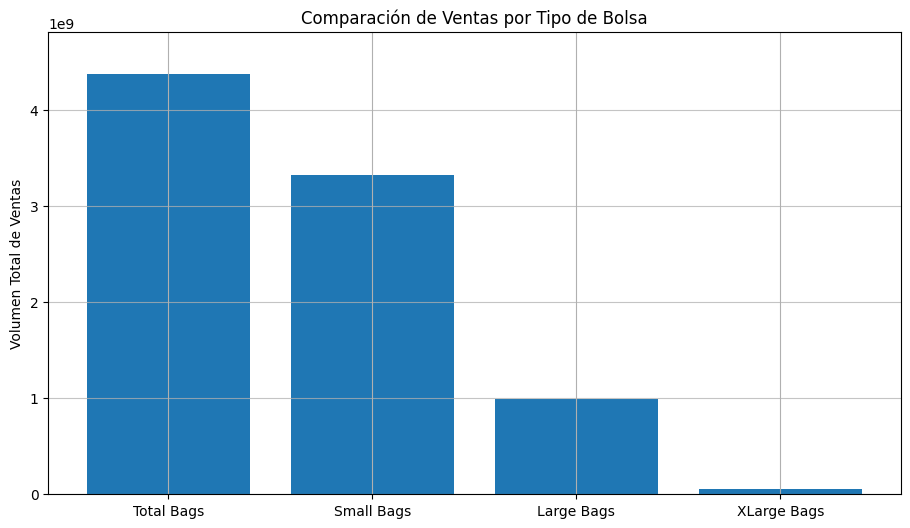

In [11]:
# 2.4 Gráfico de Barras de Ventas por Tipo de Bolsa:

# Uso de Datos: Utiliza las columnas Total Bags, Small Bags, Large Bags y XLarge Bags.
# Esperado: Compara las ventas de diferentes tipos de bolsas.
# Suma los volúmenes de ventas por tipo de bolsa utilizando sum().
# Crea un gráfico de barras con plt.bar() para mostrar las diferencias en ventas.
# Asegúrate de incluir etiquetas para cada tipo de bolsa.

# Sumar los volúmenes de ventas por tipo de bolsa
total_bags = chart.df['Total Bags'].sum()
small_bags = chart.df['Small Bags'].sum()
large_bags = chart.df['Large Bags'].sum()
xlarge_bags = chart.df['XLarge Bags'].sum()
total_volume = chart.df['Total Volume']
# Crear una lista de tipos de bolsas y sus correspondientes ventas
labels = ['Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
sales = [total_bags, small_bags, large_bags, xlarge_bags]

# Crear el gráfico de barras
chart.figureConfig(title='Comparación de Ventas por Tipo de Bolsa',ylabel='Volumen Total de Ventas')

plt.bar(labels,sales)

# Añadir etiquetas y título
plt.ylim(0, max(sales) * 1.1)  # Ajustar el límite del eje y

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.show()

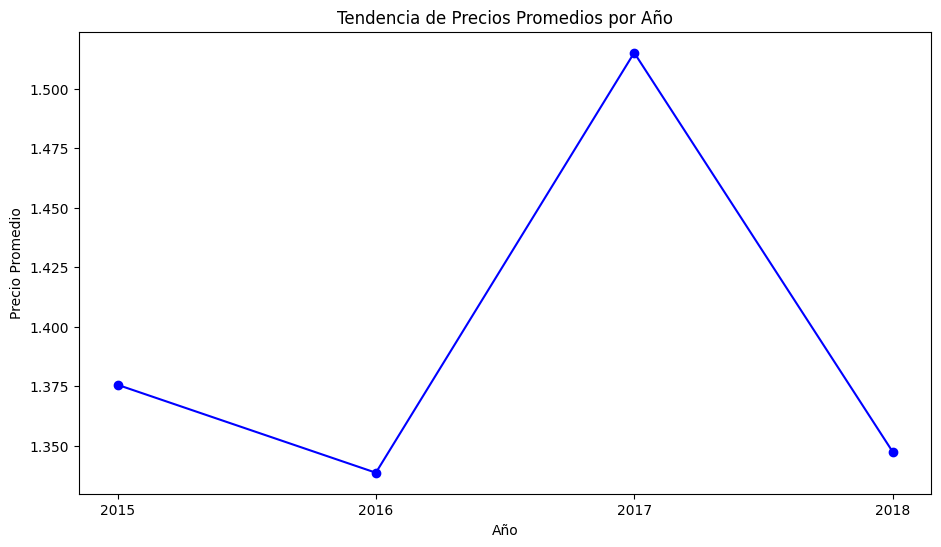

In [12]:
# 2.5 Gráfico de Líneas de Precios Promedios por Año:

# Uso de Datos: Utiliza las columnas AveragePrice y year.
# Esperado: Visualiza la tendencia de precios promedio a lo largo de los años.
# Agrupa los datos por year y calcula el promedio de AveragePrice.
# Usa plt.plot() para crear un gráfico de líneas que muestre la evolución de precios.
# Añade un título y etiquetas descriptivas a los ejes usando plt.title() y plt.xlabel().
# Agrupar los datos por año y calcular el promedio de AveragePrice
average_price_by_year = chart.df.groupby('year')['AveragePrice'].mean().reset_index()

# Crear el gráfico de líneas
chart.figureConfig(title="Tendencia de Precios Promedios por Año",xlabel="Año",ylabel="Precio Promedio")
plt.plot(average_price_by_year['year'], average_price_by_year['AveragePrice'], marker='o', color='blue', linestyle='-')

# Mostrar el gráfico
plt.grid()
plt.xticks(average_price_by_year['year'])  # Asegurar que se muestren todos los años en el eje x
plt.show()

   year  Total Volume  AveragePrice  Volume_pct_change  Price_pct_change
0  2015  4.385469e+09      1.375590                NaN               NaN
1  2016  4.820890e+09      1.338640           0.099287         -0.026862
2  2017  4.934306e+09      1.515128           0.023526          0.131841
3  2018  1.382738e+09      1.347531          -0.719770         -0.110616
0    0.000000
1   -3.696231
2    0.178441
3    6.506954
Name: Elasticity, dtype: float64


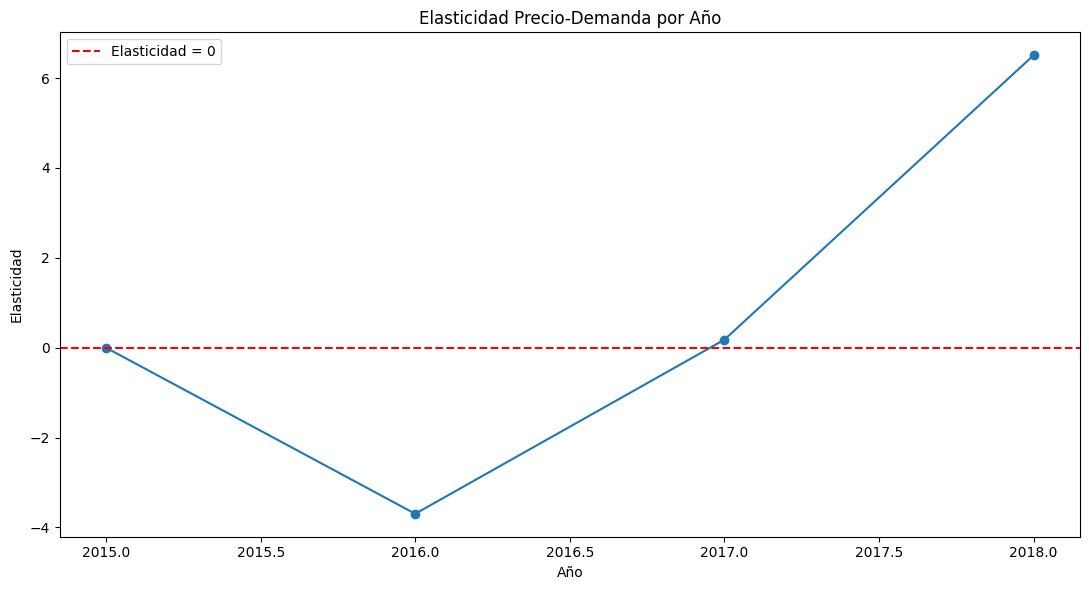

In [13]:
# Elasticidad del Precio
# 3.1 Elasticidad Precio-Demanda por Año:

# Uso de Datos: Usa las columnas AveragePrice y Total Volume.
# Esperado: Calcula la elasticidad del precio de la demanda para cada año.
# Calcula la variación porcentual de Total Volume y AveragePrice utilizando pd.pct_change().
# Utiliza la fórmula de elasticidad para determinar la sensibilidad de la demanda respecto al precio.
# Presenta los resultados en un gráfico de líneas usando plt.plot() para mostrar la elasticidad por año.
# Asegúrate de que la columna 'Date' esté en formato datetime

# Añadir columna 'year'
chart.df['year'] = chart.df['Date'].dt.year

# Agrupar por año y calcular la suma de Total Volume y el promedio de AveragePrice
yearly_data = chart.df.groupby('year').agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calcular la variación porcentual
yearly_data['Volume_pct_change'] = yearly_data['Total Volume'].pct_change()
yearly_data['Price_pct_change'] = yearly_data['AveragePrice'].pct_change()

print(yearly_data)
# Calcular la elasticidad
yearly_data['Elasticity'] = (yearly_data['Volume_pct_change'] / yearly_data['Price_pct_change']).fillna(0)
print(yearly_data['Elasticity'])

# Visualizar resultados
chart.figureConfig(title='Elasticidad Precio-Demanda por Año',xlabel='Año',ylabel='Elasticidad')
plt.plot(yearly_data['year'], yearly_data['Elasticity'], marker='o')
plt.grid()
plt.axhline(0, color='red', linestyle='--', label='Elasticidad = 0')  # Línea de referencia
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_808/3614212093.py:33: MatplotlibDeprecationWarning: Passing label as a length 3 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(region_data['year'],region_data['elasticity'],label=region_data['region'])


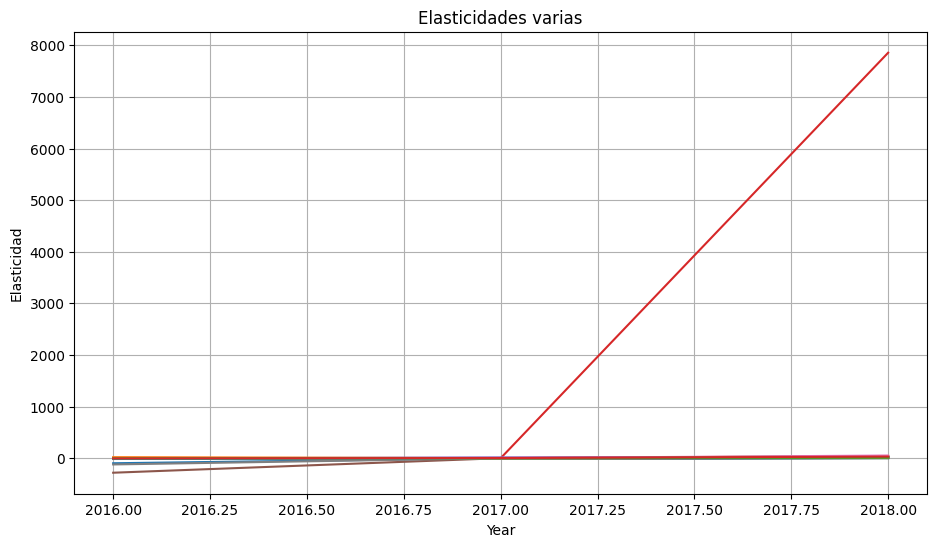

In [14]:
# 3.2 Comparación de Elasticidad en Diferentes Mercados:

# Uso de Datos: Utiliza las columnas Total Volume y AveragePrice.
# Esperado: Calcula la elasticidad del precio de la demanda en diferentes regiones.
# Agrupa los datos por region y calcula la elasticidad para cada región utilizando pd.pct_change().

# Asegúrate de que la columna 'Date' esté en formato datetime y extraemos el año para la agrupación
chart.df['Date'] = pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupamos por 'region' y 'year' y calculamos el volumen total y precio promedio anual
df_grouped = chart.df.groupby(['region', 'year']).agg(
    {
        'Total Volume': 'sum', 
        'AveragePrice': 'mean'
    }
).reset_index()

# Calculamos el cambio porcentual por región para 'Total Volume' y 'AveragePrice'
df_grouped['pct_change_volume'] = df_grouped.groupby('region')['Total Volume'].pct_change()
df_grouped['pct_change_price'] = df_grouped.groupby('region')['AveragePrice'].pct_change()


# Calculamos la elasticidad para cada región y año
df_grouped['elasticity'] = df_grouped['pct_change_volume'] / df_grouped['pct_change_price']

# Filtramos los valores NaN que pueden haber resultado del cálculo de pct_change en los primeros valores
df_elasticity = df_grouped.dropna(subset=['elasticity'])

chart.figureConfig(title="Elasticidades varias",xlabel="Year",ylabel="Elasticidad")
for region in df_elasticity['region'].unique():
    region_data = df_elasticity[df_elasticity['region'] == region]
    plt.plot(region_data['year'],region_data['elasticity'],label=region_data['region'])


# plt.legend(title='Región')
plt.show()



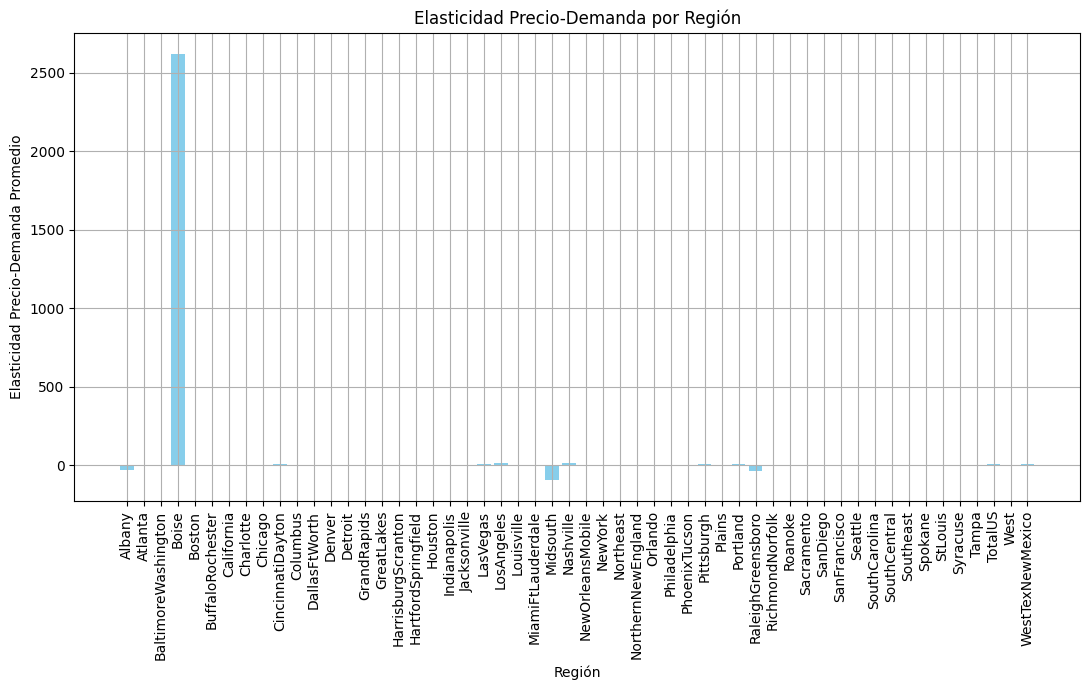

In [15]:
# Continuacion 3.2
# Presenta un gráfico de barras que muestre la elasticidad por región usando plt.bar().

chart.df['Date'] = pd.to_datetime(chart.df['Date'])
chart.df['year'] = chart.df['Date'].dt.year

# Agrupo por año y región, y calcula el promedio de 'AveragePrice' y la suma de 'Total Volume'
el_price_vs_demanda = chart.df.groupby(['year', 'region']).agg({
    'Total Volume': 'sum',
    'AveragePrice': 'mean'
}).reset_index()

# Calcula el cambio porcentual de volumen y precio para cada región
# pct_change() es Cambio porcentual

el_price_vs_demanda['pct_change_volume'] = el_price_vs_demanda.groupby('region')['Total Volume'].pct_change().fillna(0)
el_price_vs_demanda['pct_change_price'] = el_price_vs_demanda.groupby('region')['AveragePrice'].pct_change().fillna(0)

# Calcula la elasticidad como el cociente entre el cambio porcentual de volumen y de precio
el_price_vs_demanda['elasticidad'] = el_price_vs_demanda['pct_change_volume'] / el_price_vs_demanda['pct_change_price']

# Filtra regiones sin valores NaN en elasticidad
elasticidad_por_region = el_price_vs_demanda.dropna(subset=['elasticidad'])

# Agrupa por región para obtener la elasticidad promedio de cada región
elasticidad_media_por_region = elasticidad_por_region.groupby('region')['elasticidad'].mean().reset_index()

# Graficar elasticidad promedio por región
chart.figureConfig(11, 7,title="Elasticidad Precio-Demanda por Región",xlabel="Región",ylabel="Elasticidad Precio-Demanda Promedio")
plt.bar(elasticidad_media_por_region['region'], elasticidad_media_por_region['elasticidad'], color='skyblue')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


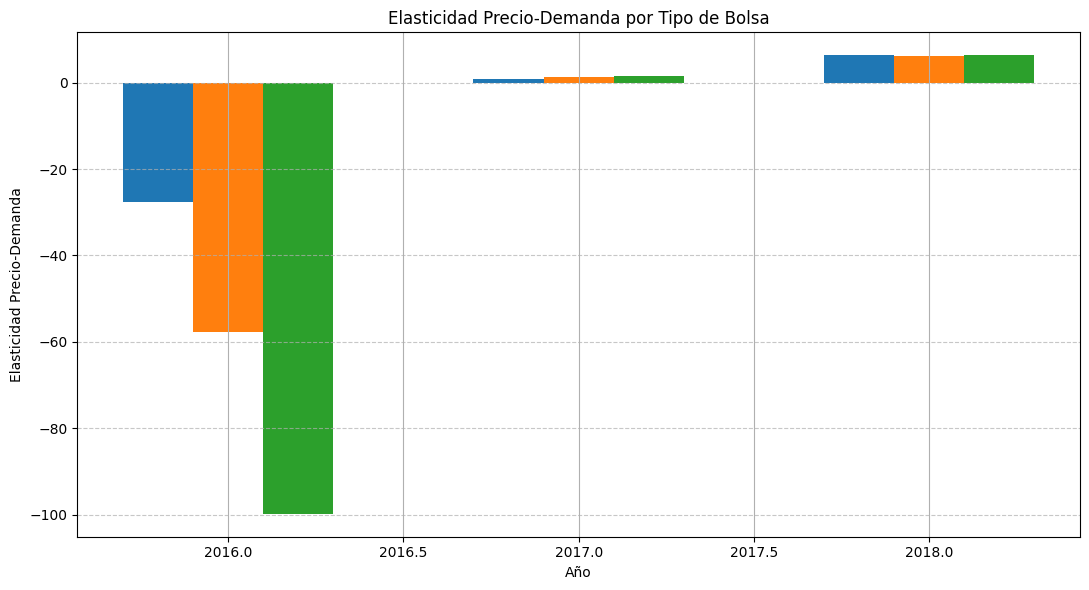

In [16]:
# 3.3 Elasticidad a Nivel de Tipo de Bolsa:

# Uso de Datos: Usa las columnas AveragePrice y Total Bags.
# Esperado: Calcula la elasticidad del precio de la demanda específica para cada tipo de bolsa.
# Suma los volúmenes de ventas por tipo de bolsa utilizando groupby() y sum().
# Calcula la elasticidad para cada tipo y presenta los resultados en un gráfico comparativo usando plt.bar().
# TIPOS DE BOLSA Small Bags	Large Bags	XLarge Bags	
# Sumar los volúmenes de ventas por tipo de bolsa
# 1. Agrupar por tipo de bolsa y sumar volúmenes de ventas
# 1. Agrupar por tipo de bolsa y sumar volúmenes de ventas


# a) Para calcular la elasticidad del precio de la demanda específica de cada tipo de bolsa (Small Bags, Large Bags, XLarge Bags) 
#  en base al archivo CSV adjunto, haremos lo siguiente:
# b) Agruparemos y sumaremos los volúmenes de ventas por cada tipo de bolsa.
# c) Calcularemos la variación porcentual de AveragePrice y de cada tipo de bolsa por año usando pct_change.
# d) Calcularemos la elasticidad para cada tipo de bolsa dividiendo la variación porcentual de ventas por la variación porcentual del precio.
# e) Visualizaremos los resultados en un gráfico de barras para comparar las elasticidades entre los tipos de bolsa.

chart.df['year'] = chart.df['Date'].dt.year

# Agrupar por año y sumar volúmenes para cada tipo de bolsa y calcular el precio promedio
df_grouped = chart.df.groupby('year').agg(
    {
        'AveragePrice': 'mean',
        'Small Bags': 'sum',
        'Large Bags': 'sum',
        'XLarge Bags': 'sum'
    }
).reset_index()

# Calcular el cambio porcentual anual para cada tipo de bolsa y el precio promedio
df_grouped['pct_change_price'] = df_grouped['AveragePrice'].pct_change()
df_grouped['pct_change_small'] = df_grouped['Small Bags'].pct_change()
df_grouped['pct_change_large'] = df_grouped['Large Bags'].pct_change()
df_grouped['pct_change_xlarge'] = df_grouped['XLarge Bags'].pct_change()

# Calcular la elasticidad para cada tipo de bolsa
df_grouped['elasticity_small'] = df_grouped['pct_change_small'] / df_grouped['pct_change_price']
df_grouped['elasticity_large'] = df_grouped['pct_change_large'] / df_grouped['pct_change_price']
df_grouped['elasticity_xlarge'] = df_grouped['pct_change_xlarge'] / df_grouped['pct_change_price']

# Filtrar valores NaN resultantes de pct_change()
df_elasticity = df_grouped.dropna(subset=['elasticity_small', 'elasticity_large', 'elasticity_xlarge'])

# Visualizar los resultados en un gráfico de barras
chart.figureConfig(title="Elasticidad Precio-Demanda por Tipo de Bolsa",xlabel="Año",ylabel="Elasticidad Precio-Demanda")
plt.bar(df_elasticity['year'] - 0.2, df_elasticity['elasticity_small'], width=0.2, label='Small Bags')
plt.bar(df_elasticity['year'], df_elasticity['elasticity_large'], width=0.2, label='Large Bags')
plt.bar(df_elasticity['year'] + 0.2, df_elasticity['elasticity_xlarge'], width=0.2, label='XLarge Bags')

# Configuración del gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



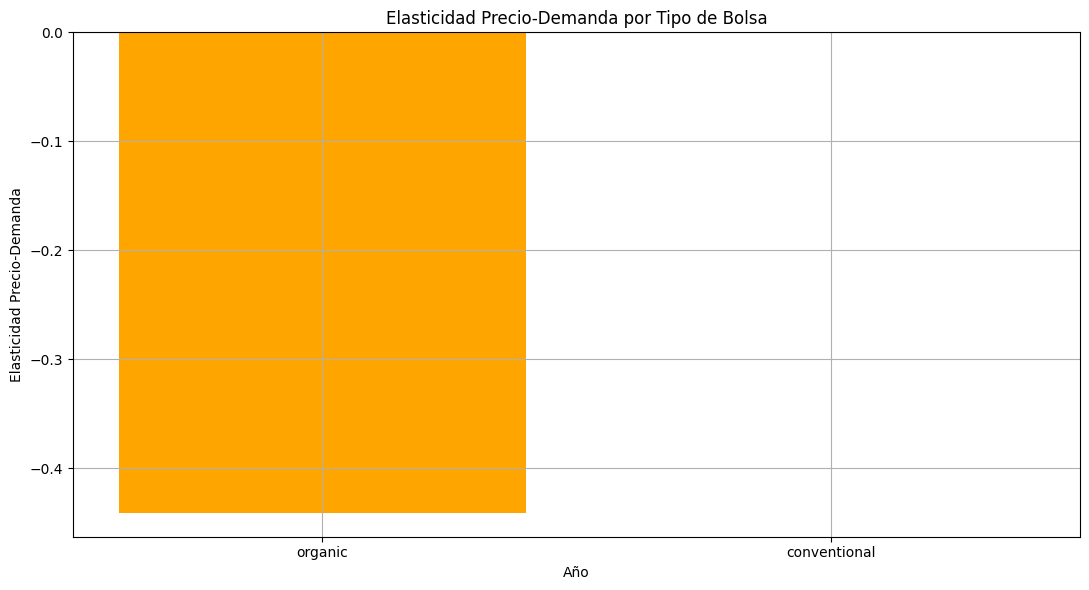

In [17]:
# 3.4 Análisis de Elasticidad Comparativa entre Orgánicos y Convencionales:

# Uso de Datos: Usa las columnas AveragePrice, Total Volume y type.
# Esperado: Compara la elasticidad de la demanda entre aguacates orgánicos y convencionales.
# Agrupa los datos por type y calcula la elasticidad utilizando pd.pct_change().
# Presenta un gráfico que muestre la diferencia en elasticidad entre los dos tipos usando plt.bar()

gp_avocado_type =  chart.df.groupby(['type']).agg({
    'AveragePrice':'mean',
    'Total Volume' : 'sum'
}).reset_index()


gp_avocado_type['pct_av_change_price'] =   gp_avocado_type['AveragePrice'].pct_change().fillna(0)
gp_avocado_type['pct_av_change_volume'] =   gp_avocado_type['Total Volume'].pct_change().fillna(0)



gp_avocado_type['elasticity'] = (gp_avocado_type['pct_av_change_price']  / gp_avocado_type['pct_av_change_volume']).fillna(0)
gp_avocado_type.dropna(subset=['AveragePrice','Total Volume'])


# Separar los datos para facilitar la visualización
elasticity_organic = gp_avocado_type[gp_avocado_type['type'] == 'organic']
elasticity_conventional = gp_avocado_type[gp_avocado_type['type'] == 'conventional']


chart.figureConfig(title="Elasticidad Precio-Demanda por Tipo de Bolsa",xlabel="Año",ylabel="Elasticidad Precio-Demanda")
plt.bar(elasticity_organic['type'], elasticity_organic['elasticity'], color='orange',label="Organico")
plt.bar(elasticity_conventional['type'], elasticity_conventional['elasticity'], color='orange',label="Conventional")
plt.tight_layout()
plt.show()

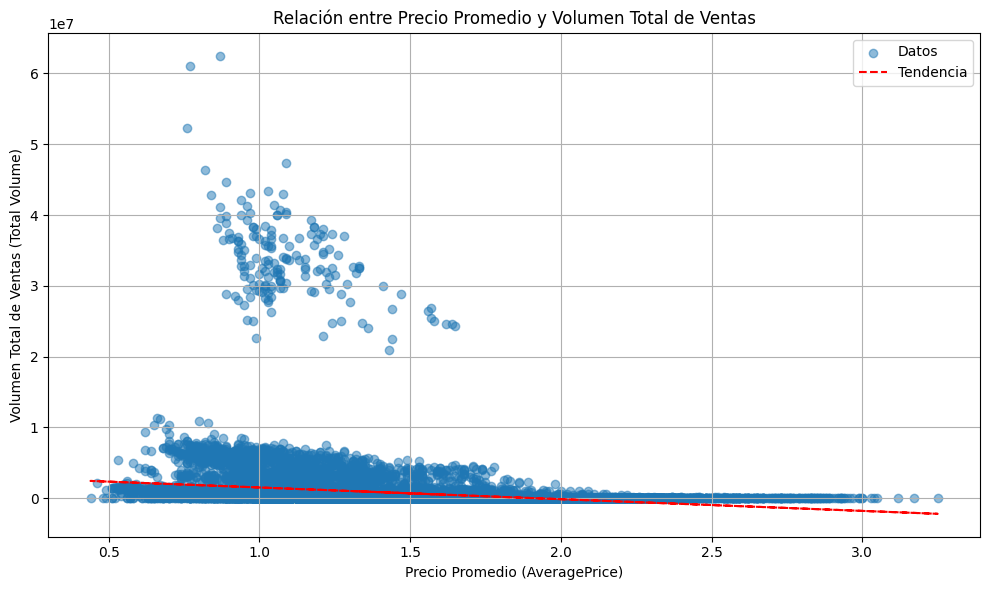

In [78]:
# 3.5 Análisis de la Elasticidad Precios-Ventas:

# Uso de Datos: Usa las columnas AveragePrice y Total Volume.
# Esperado: Examina cómo las variaciones en AveragePrice afectan a Total Volume.
# Realiza un análisis de la relación entre estas dos variables calculando la elasticidad.
# Presenta un gráfico de dispersión que muestre la relación y discute la tendencia observada utilizando plt.scatter() y plt.plot()


# Calcular la variación porcentual de AveragePrice y Total Volume
chart.df['pct_change_price'] = chart.df['AveragePrice'].pct_change().fillna(0)
chart.df['pct_change_volume'] = chart.df['Total Volume'].pct_change().fillna(0)

# Calcular la elasticidad precios-ventas
chart.df['elasticity'] = chart.df['pct_change_volume'] / chart.df['pct_change_price']

# Crear el gráfico de dispersión entre AveragePrice y Total Volume
plt.figure(figsize=(10, 6))
plt.scatter(chart.df['AveragePrice'], chart.df['Total Volume'], alpha=0.5, label='Datos')

# Ajustar una línea de tendencia para observar la relación
z = np.polyfit(chart.df['AveragePrice'], chart.df['Total Volume'], 1)
p = np.poly1d(z)
plt.plot(chart.df['AveragePrice'], p(chart.df['AveragePrice']), "r--", label='Tendencia')

# Configuración del gráfico
plt.xlabel('Precio Promedio (AveragePrice)')
plt.ylabel('Volumen Total de Ventas (Total Volume)')
plt.title('Relación entre Precio Promedio y Volumen Total de Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_942/3803880060.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cohortes_trimestrales = chart.df.groupby(pd.Grouper(key='Date', freq='Q')).agg(


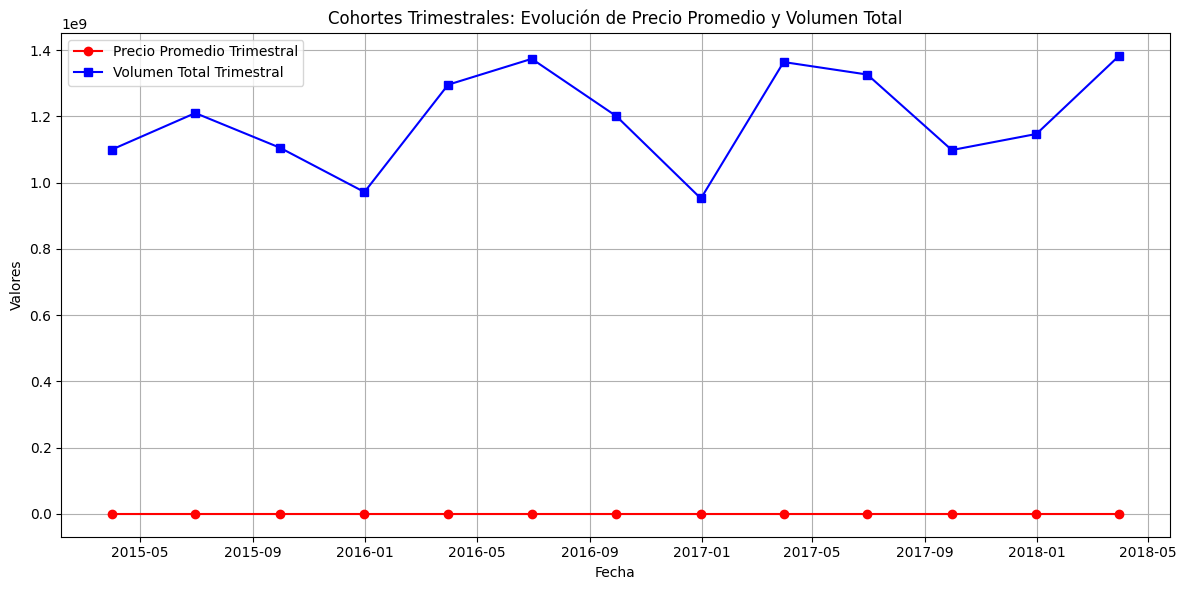

In [80]:
# 4.1  Cohortes Basadas en Precios Promedios Trimestrales:

# Uso de Datos: Usa las columnas AveragePrice, Total Volume y Date.
# Esperado: Crea cohortes trimestrales y analiza cambios en precios y volúmenes.
# Agrupa los datos por trimestre usando pd.Grouper con freq='Q'.
# Calcula el promedio de AveragePrice y suma Total Volume para cada cohorte.
# Visualiza los resultados en un gráfico de líneas que muestre la evolución de las cohortes.

# Agrupar los datos por trimestre y calcular el promedio de AveragePrice y la suma de Total Volume
cohortes_trimestrales = chart.df.groupby(pd.Grouper(key='Date', freq='Q')).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Graficar la evolución de precios y volúmenes trimestrales
plt.figure(figsize=(12, 6))

# Línea para precios promedio trimestrales
plt.plot(cohortes_trimestrales['Date'], cohortes_trimestrales['AveragePrice'], color='red', marker='o', label='Precio Promedio Trimestral')

# Línea para volumen total trimestral
plt.plot(cohortes_trimestrales['Date'], cohortes_trimestrales['TotalVolume'], color='blue', marker='s', label='Volumen Total Trimestral')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Cohortes Trimestrales: Evolución de Precio Promedio y Volumen Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_942/4193627227.py:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  cohortes_region_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg(


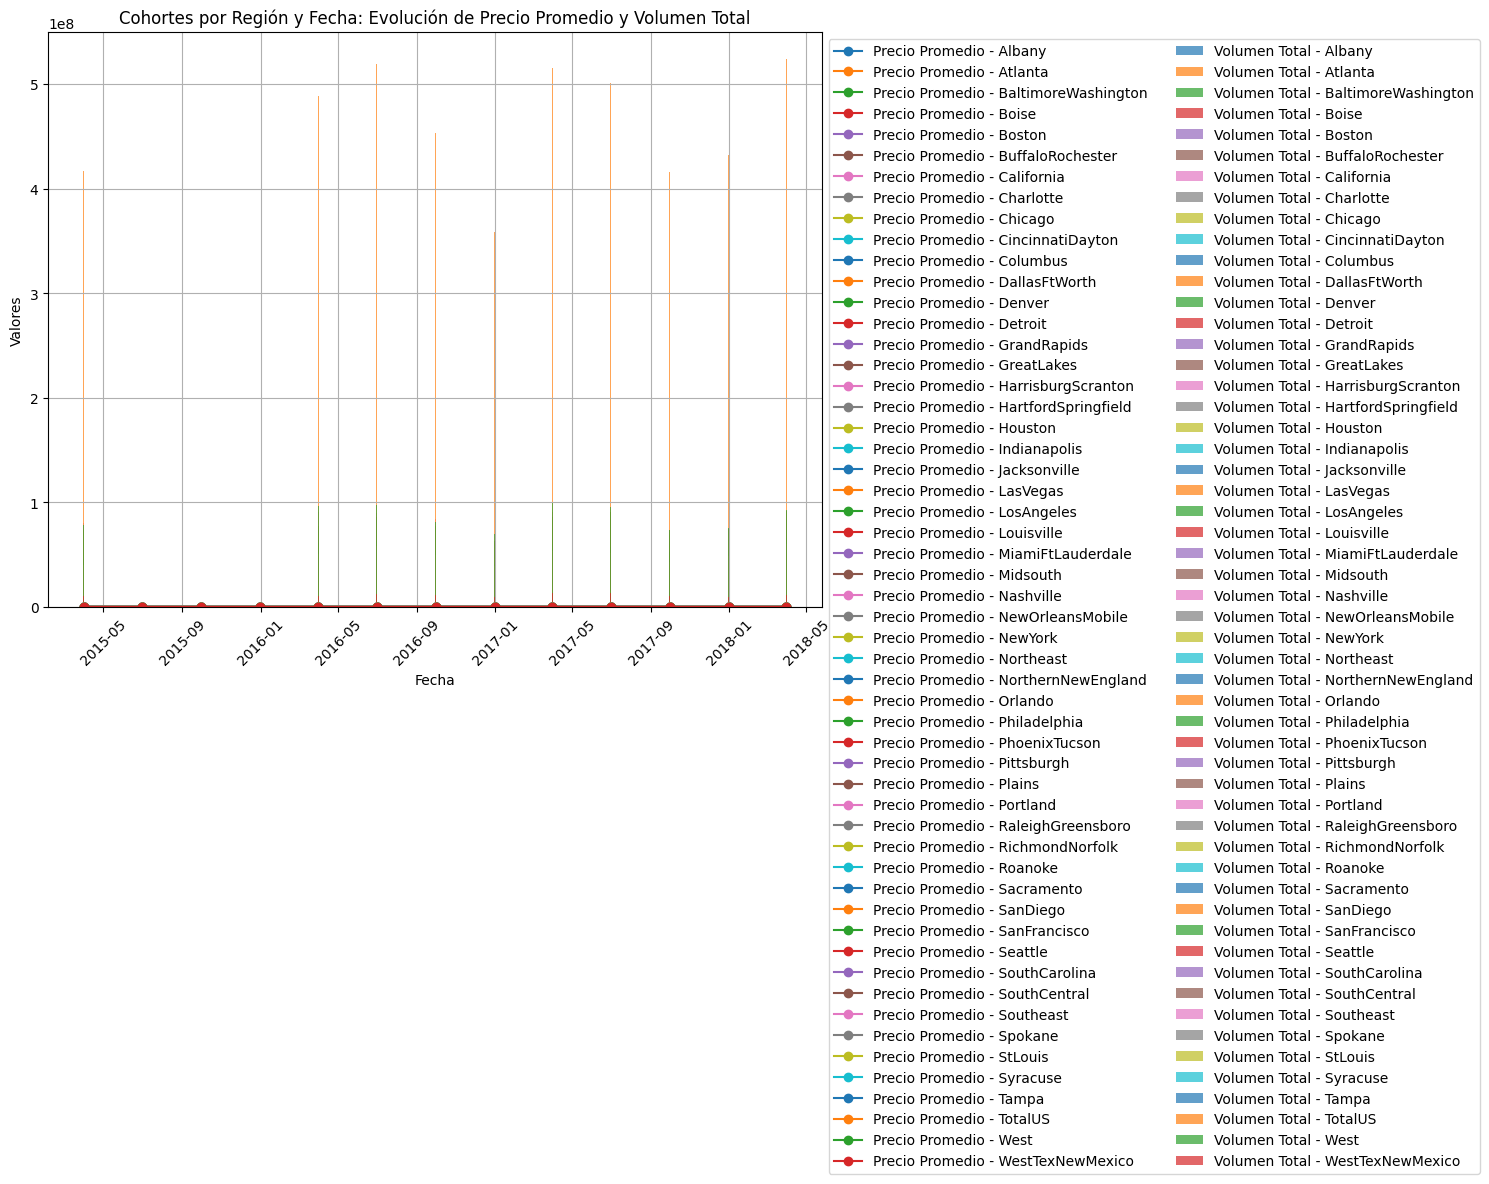

In [82]:
# 4.2 Cohortes por Región y Fecha:

# Uso de Datos: Utiliza las columnas AveragePrice, Total Volume, region y Date.
# Esperado: Analiza cómo varían las cohortes de diferentes regiones.
# Agrupa los datos por region y Date usando groupby().
# Calcula el promedio de precios y volumen para cada cohorte.
# Presenta los resultados en gráficos de barras que muestren comparaciones entre regiones.

# Agrupar los datos por región y fecha (trimestres) y calcular el promedio de precios y la suma de volumen
cohortes_region_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='Q'), 'region']).agg(
    AveragePrice=('AveragePrice', 'mean'),
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Generar un gráfico de barras para cada región
for region in cohortes_region_fecha['region'].unique():
    data_region = cohortes_region_fecha[cohortes_region_fecha['region'] == region]
    
    # Crear subgráficos para cada región
    plt.bar(data_region['Date'], data_region['TotalVolume'], label=f'Volumen Total - {region}', alpha=0.7)
    plt.plot(data_region['Date'], data_region['AveragePrice'], marker='o', label=f'Precio Promedio - {region}')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Cohortes por Región y Fecha: Evolución de Precio Promedio y Volumen Total')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)  # Leyenda fuera del gráfico para claridad
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Interpretación del Gráfico
# El gráfico muestra la evolución de AveragePrice y Total Volume para cada región a lo largo del tiempo. 
# Las barras representan el volumen total y las líneas indican el precio promedio en cada trimestre, lo que ayuda a comparar 
# cómo las diferentes regiones responden a cambios en el mercado.

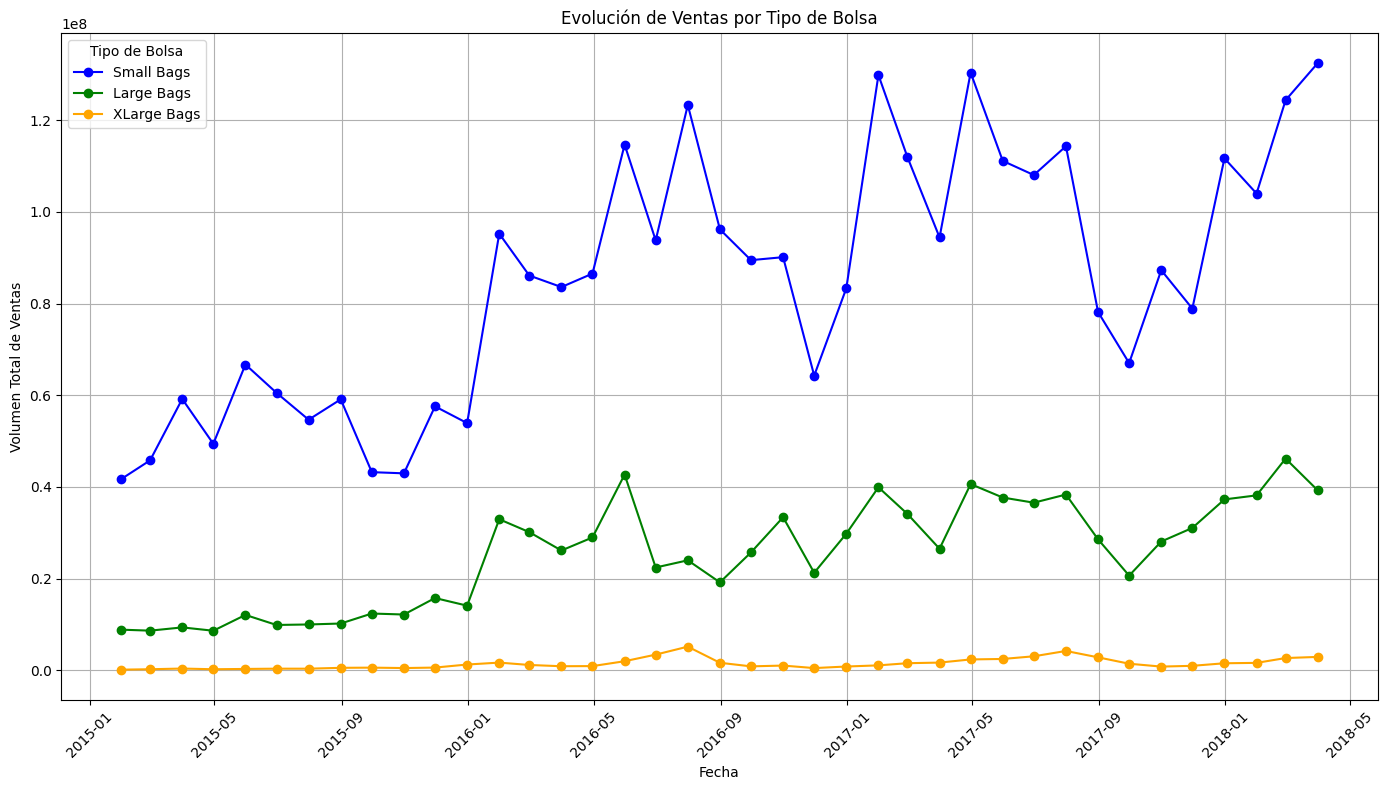

In [18]:
# 4.3 Análisis de Cohortes en Función del Tipo de Bolsa:

# Uso de Datos: Usa las columnas Total Bags, Small Bags, Large Bags, XLarge Bags y Date.
# Esperado: Examina cómo se comportan las diferentes cohortes según el tipo de bolsa.
# Agrupa los datos por tipo de bolsa y Date.
# Calcula el volumen de ventas total y muestra los resultados en un gráfico de líneas.

# Crear una estructura de datos con el total de ventas por tipo de bolsa en cada fecha
bolsas_por_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='ME')]).agg(
    TotalBags=('Total Bags', 'sum'),
    SmallBags=('Small Bags', 'sum'),
    LargeBags=('Large Bags', 'sum'),
    XLargeBags=('XLarge Bags', 'sum')
).reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['SmallBags'], label='Small Bags', marker='o', color='blue')
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['LargeBags'], label='Large Bags', marker='o', color='green')
plt.plot(bolsas_por_fecha['Date'], bolsas_por_fecha['XLargeBags'], label='XLarge Bags', marker='o', color='orange')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.title('Evolución de Ventas por Tipo de Bolsa')
plt.legend(title='Tipo de Bolsa')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicación del Código
# Conversión de Fecha: Convertimos Date a formato datetime y usamos pd.Grouper con freq='M' para agrupar los datos mensualmente.
# Agrupación y Cálculo del Volumen de Ventas Total: Calculamos la suma de Small Bags, Large Bags, y XLarge Bags por cada mes.
# Visualización:
# Creamos un gráfico de líneas para cada tipo de bolsa (Small Bags, Large Bags, y XLarge Bags), lo que permite ver cómo cambia el volumen de ventas
# en cada fecha.
# Ajustamos la visualización con etiquetas, título, y leyenda.
# Interpretación del Gráfico
# El gráfico muestra la evolución mensual del volumen de ventas para cada tipo de bolsa. 
# Esto permite observar si algún tipo de bolsa predomina en volumen de ventas o si hay patrones estacionales o de tendencia en el tiempo para cada categoría.



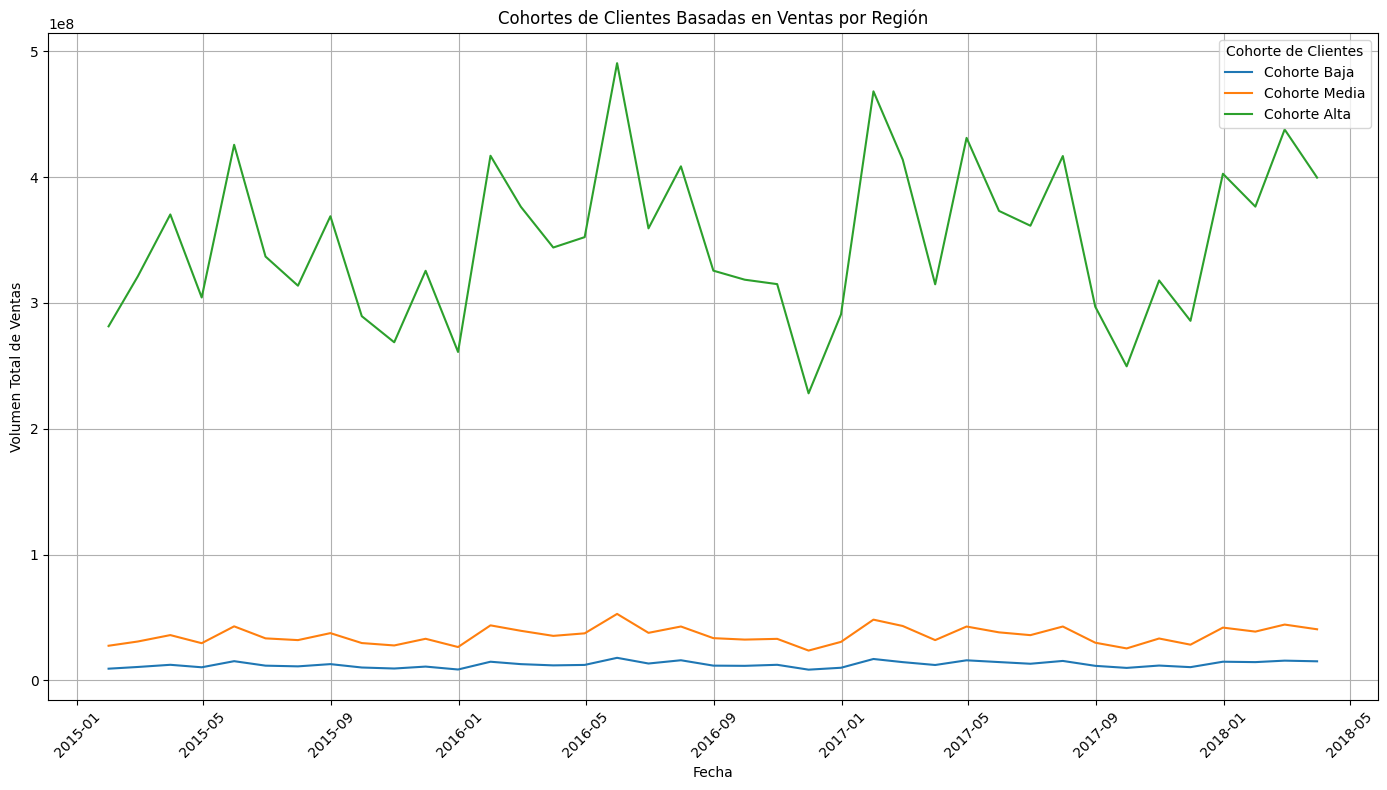

In [19]:
# 4.4 Cohortes de Clientes Basadas en Ventas:

# Uso de Datos: Usa las columnas Total Volume, Date y region.
# Esperado: Analiza el comportamiento de las cohortes según el volumen de ventas.
# Clasifica los clientes según su volumen de compras.
# Visualiza las cohortes en gráficos de líneas o barras que muestren el comportamiento de compra a lo largo del tiempo.

# Agrupar por region y Date, calculando el total de ventas
ventas_por_region_fecha = chart.df.groupby([pd.Grouper(key='Date', freq='ME'), 'region']).agg(
    TotalVolume=('Total Volume', 'sum')
).reset_index()

# Clasificar las regiones en cohortes según el volumen de ventas promedio total
# Calculamos el volumen promedio para cada región
volumen_promedio_por_region = ventas_por_region_fecha.groupby('region')['TotalVolume'].mean()

# Definimos las cohortes: Baja, Media, Alta en función del cuartil
cuartiles = pd.qcut(volumen_promedio_por_region, 3, labels=['Baja', 'Media', 'Alta'])

# Agregar la cohorte a cada región en el DataFrame original
ventas_por_region_fecha['Cohorte'] = ventas_por_region_fecha['region'].map(cuartiles)

# Crear el gráfico de líneas para cada cohorte
plt.figure(figsize=(14, 8))

for cohorte in ventas_por_region_fecha['Cohorte'].unique():
    subset = ventas_por_region_fecha[ventas_por_region_fecha['Cohorte'] == cohorte]
    subset_grouped = subset.groupby('Date')['TotalVolume'].sum()
    
    plt.plot(subset_grouped.index, subset_grouped, label=f'Cohorte {cohorte}')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Volumen Total de Ventas')
plt.title('Cohortes de Clientes Basadas en Ventas por Región')
plt.legend(title='Cohorte de Clientes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Explicación del Código
# Agrupación y Suma de Ventas: Agrupamos los datos por Date (a nivel mensual) y region, sumando el Total Volume para obtener el volumen total de ventas por región y fecha.
# Clasificación en Cohortes:
# Calculamos el volumen de ventas promedio para cada región y lo dividimos en tres cohortes (Baja, Media y Alta) usando pd.qcut().
# Asignamos cada región a una cohorte en función de su volumen de ventas promedio.
# Visualización:
# Creamos una línea para cada cohorte (Baja, Media, Alta), mostrando cómo varía el volumen de ventas total a lo largo del tiempo.
# Interpretación del Gráfico
# Este gráfico permite ver cómo se comportan las cohortes de clientes a lo largo del tiempo en función de su volumen de ventas. 
# Las tendencias pueden indicar patrones de compra diferenciados por región o períodos de alta/baja demanda según la cohorte.

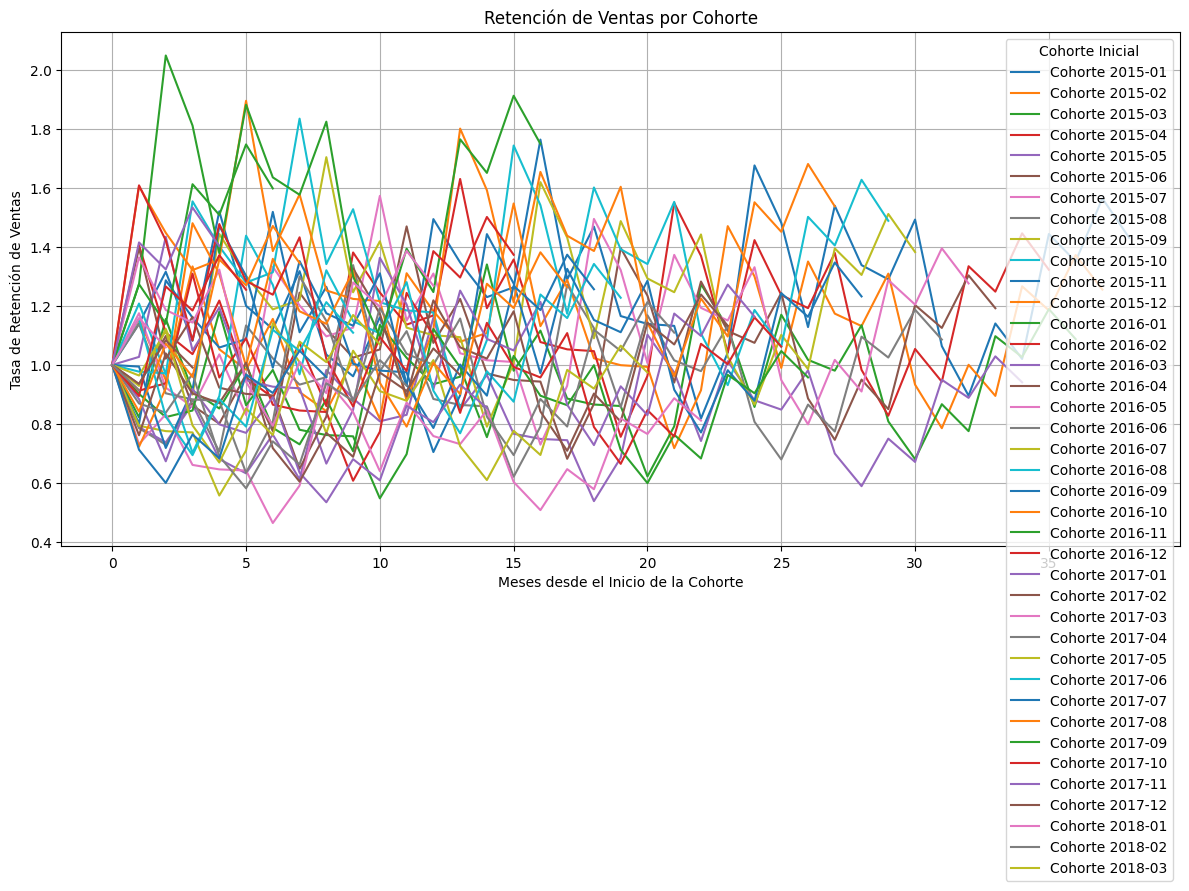

In [21]:
# 4.5 Evaluación de Retención de Ventas por Cohorte:

# Uso de Datos: Usa las columnas Total Volume y Date.
# Esperado: Estudia cómo se retienen las ventas en cohortes a lo largo de un año.
# Agrupa los datos por mes y cohortes.
# Calcula la retención de ventas y visualiza los resultados en un gráfico de líneas que muestre las tasas de retención.
# Agrupar los datos por mes y calcular el volumen total de ventas
chart.df['Month'] = chart.df['Date'].dt.to_period('M')
ventas_mensuales = chart.df.groupby('Month')['Total Volume'].sum().reset_index()

# Crear una columna para identificar la cohorte de cada mes como mes inicial de la cohorte
ventas_mensuales['Cohorte'] = ventas_mensuales['Month']

# Convertir de periodo a fecha para simplificar manipulación posterior
ventas_mensuales['Month'] = ventas_mensuales['Month'].dt.to_timestamp()

# Crear una tabla pivote para mostrar la retención por cohorte
retencion_cohorte = pd.DataFrame()

for i, mes in enumerate(ventas_mensuales['Cohorte']):
    # Calcular el volumen inicial de la cohorte y el volumen en meses subsiguientes
    ventas_inicial = ventas_mensuales.loc[ventas_mensuales['Cohorte'] == mes, 'Total Volume'].values[0]
    ventas_sucesivas = ventas_mensuales['Total Volume'].iloc[i:].reset_index(drop=True) / ventas_inicial
    retencion_cohorte[mes] = ventas_sucesivas

# Gráfico de retención de ventas
plt.figure(figsize=(12, 8))
for cohorte in retencion_cohorte.columns:
    plt.plot(retencion_cohorte[cohorte].values, label=f'Cohorte {cohorte.strftime("%Y-%m")}')
    
plt.title("Retención de Ventas por Cohorte")
plt.xlabel("Meses desde el Inicio de la Cohorte")
plt.ylabel("Tasa de Retención de Ventas")
plt.legend(title="Cohorte Inicial")
plt.grid(True)
plt.tight_layout()
plt.show()

# Explicación del Código
# Agrupación Mensual: Agrupamos el volumen de ventas a nivel mensual.
# Identificación de Cohortes: Cada mes se marca como el inicio de una nueva cohorte.
# Cálculo de Retención: Para cada cohorte inicial, calculamos la tasa de retención mensual dividiendo el volumen de ventas en meses subsiguientes 
# por el volumen inicial.
# Visualización: Creamos un gráfico de líneas en el que cada cohorte tiene su propia línea, mostrando la tasa de retención a lo largo de los meses.
# Interpretación del Gráfico
# Este gráfico mostrará cómo las ventas se retienen o disminuyen mes a mes para cada cohorte. Las tendencias ayudan a evaluar 
# la estabilidad de las ventas en el tiempo.

In [35]:
# 5.1 Matriz de Correlación:

# Uso de Datos: Utiliza las columnas numéricas del DataFrame (p. ej., AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags).
# Esperado:
# Importa las librerías necesarias: import seaborn as sns y import matplotlib.pyplot as plt.
# Calcula la matriz de correlación usando el método .corr() del DataFrame.
# Visualiza la matriz utilizando sns.heatmap().
# Anota las correlaciones más significativas y discute su posible impacto en el análisis.
cols = chart.df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags']].reset_index()
cols.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 998.1 KB
